\# Advanced MIcroeconomics Assignment

In [3]:
print('hello microeconomics')

hello microeconomics


In [11]:
API_KEY = "3ab13a0b04a2f09524d1289857ca3e0f"
API_URL = 'http://api.eia.gov/category/?api_key=YOUR_API_KEY_HERE&category_id=294392'

In [5]:
import requests
response = requests.get(API_URL)
print(response.status_code)

200


200 – OK. The request was successful. The answer itself depends on the method used (GET, POST, etc.) and the API specification.

204 – No Content. The server successfully processed the request and did not return any content.

301 – Moved Permanently. The server responds that the requested page (endpoint) has been moved to another address and redirects to this address.

400 – Bad Request. The server cannot process the request because the client-side errors (incorrect request format).

401 – Unauthorized. Occurs when authentication was failed, due to incorrect credentials or even their absence.

403 – Forbidden. Access to the specified resource is denied.

404 – Not Found. The requested resource was not found on the server.

500 – Internal Server Error. Occurs when an unknown error has occurred on the server.

In [6]:
print(response.text)

{"request":{"category_id":"294392","command":"category"},"data":{"error":"invalid or missing api_key. For key registration, documentation, and examples see https:\/\/www.eia.gov\/developer\/"}}


In [10]:
import json
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)
jprint(response.json())

ModuleNotFoundError: No module named 'urllib2'

In [ ]:
# prima che capusco come fare questa roba passa un anno quindi lo faccio con i file

# Data Management

## Import Data

In [29]:
import pandas as pd
import numpy as np

In [15]:
data_location = 'C:/Users/User/Desktop/university/advanced microeconomics/project/analysis/data'

# file extensions
excel_old = '.xls'
excel = '.xlsx'

# file name
futures_data_name = '/'+'PET_PRI_FUT_S1_D'
crude_oil_production_name = '/'+ 'Table_3.1_Petroleum_Overview'
spot_prices_name = '/'+ 'PET_PRI_SPT_S1_D'


# import data
futures_data = pd.read_excel(data_location + futures_data_name + excel_old, sheet_name = 'Data 1', header = 2)
crude_oil_production_data = pd.read_excel(data_location + crude_oil_production_name + excel, sheet_name = 'Monthly Data', header = 10)
spot_prices_data = pd.read_excel(data_location + spot_prices_name + excel_old, sheet_name = 'Data 1', header = 2)

## Select Data

### retrive only useful columns

In [19]:
spot_prices_data = spot_prices_data[['Date','Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']]
spot_prices_data.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [8]:
crude_oil_production_total = crude_oil_production_data[['Month','Crude Oil Production, Total']]
crude_oil_production_total.head()

,Month,"Crude Oil Production, Total"
0,NaT,(Thousand Barrels per Day)
1,1973-01-01,9175.93
2,1973-02-01,9395.21
3,1973-03-01,9271.93
4,1973-04-01,9291.9


In [9]:
futures_data.head()

,Date,"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)"
0,1983-03-30,NaN,NaN,29.35,NaN
1,1983-03-31,NaN,NaN,29.24,NaN
2,1983-04-04,29.44,NaN,29.10,NaN
3,1983-04-05,29.71,NaN,29.35,NaN
4,1983-04-06,29.92,NaN,29.50,NaN


In [10]:
futures_3_months = futures_data[['Date','Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)']]
futures_3_months

,Date,"Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)"
0,1983-03-30,NaN
1,1983-03-31,NaN
2,1983-04-04,NaN
3,1983-04-05,NaN
4,1983-04-06,NaN
...,...,...
9514,2021-02-17,60.18
9515,2021-02-18,59.67
9516,2021-02-19,58.66
9517,2021-02-22,60.90


### retrieve only useful timespan

In [11]:
futures_3_months.dtypes

Date                                                            datetime64[ns]
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)           float64
dtype: object

In [12]:
start_date = pd.to_datetime('2019-02-23', utc= False)
end_date = pd.to_datetime('2021-02-23', utc= False)
crude_oil_production_total[(crude_oil_production_total['Month'] > start_date) & (crude_oil_production_total['Month'] <= end_date)]

,Month,"Crude Oil Production, Total"
555,2019-03-01,11937.3
556,2019-04-01,12134.7
557,2019-05-01,12163.2
558,2019-06-01,12087.5
559,2019-07-01,11819.1
560,2019-08-01,12424.8
561,2019-09-01,12495.2
562,2019-10-01,12672.6
563,2019-11-01,12859.8
564,2019-12-01,12802.1


In [14]:
crude_oil_production_total.shape

(578, 2)

In [13]:
start_date = pd.to_datetime('2019-02-23', utc= False)
end_date = pd.to_datetime('2021-02-23', utc= False)
futures_3_months[(futures_3_months['Date'] > start_date) & (futures_3_months['Date'] <= end_date)]

,Date,"Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)"
9015,2019-02-25,56.88
9016,2019-02-26,57.01
9017,2019-02-27,58.33
9018,2019-02-28,58.49
9019,2019-03-01,57.11
...,...,...
9514,2021-02-17,60.18
9515,2021-02-18,59.67
9516,2021-02-19,58.66
9517,2021-02-22,60.90


## merge

In [66]:
merged_dataframe = spot_prices_data.merge(futures_3_months,how='left', on = 'Date')
merged_dataframe.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)"
0,1986-01-02,25.56,23.21
1,1986-01-03,26.00,23.62
2,1986-01-06,26.53,24.18
3,1986-01-07,25.85,23.75
4,1986-01-08,25.87,23.40


In [67]:
merged_dataframe['Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)'].isna().value_counts()

False    8817
True      179
Name: Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel), dtype: int64

In [68]:
merged_dataframe['Log Spot Prices'] = np.log(merged_dataframe['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])
merged_dataframe.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)",Log Spot Prices
0,1986-01-02,25.56,23.21,3.241029
1,1986-01-03,26.00,23.62,3.258097
2,1986-01-06,26.53,24.18,3.278276
3,1986-01-07,25.85,23.75,3.252311
4,1986-01-08,25.87,23.40,3.253084


In [69]:
merged_dataframe['Log Futures Prices'] = np.log(merged_dataframe['Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)'])
merged_dataframe.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)",Log Spot Prices,Log Futures Prices
0,1986-01-02,25.56,23.21,3.241029,3.144583
1,1986-01-03,26.00,23.62,3.258097,3.162094
2,1986-01-06,26.53,24.18,3.278276,3.185526
3,1986-01-07,25.85,23.75,3.252311,3.167583
4,1986-01-08,25.87,23.40,3.253084,3.152736


In [70]:
merged_dataframe['diff log spot prices'] = merged_dataframe['Log Spot Prices'].diff()
merged_dataframe['diff log futures prices'] = merged_dataframe['Log Futures Prices'].diff()
merged_dataframe.head()

,Date,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)",Log Spot Prices,Log Futures Prices,diff log spot prices,diff log futures prices
0,1986-01-02,25.56,23.21,3.241029,3.144583,NaN,NaN
1,1986-01-03,26.00,23.62,3.258097,3.162094,0.017068,0.017511
2,1986-01-06,26.53,24.18,3.278276,3.185526,0.020180,0.023432
3,1986-01-07,25.85,23.75,3.252311,3.167583,-0.025966,-0.017943
4,1986-01-08,25.87,23.40,3.253084,3.152736,0.000773,-0.014847


## VAR

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

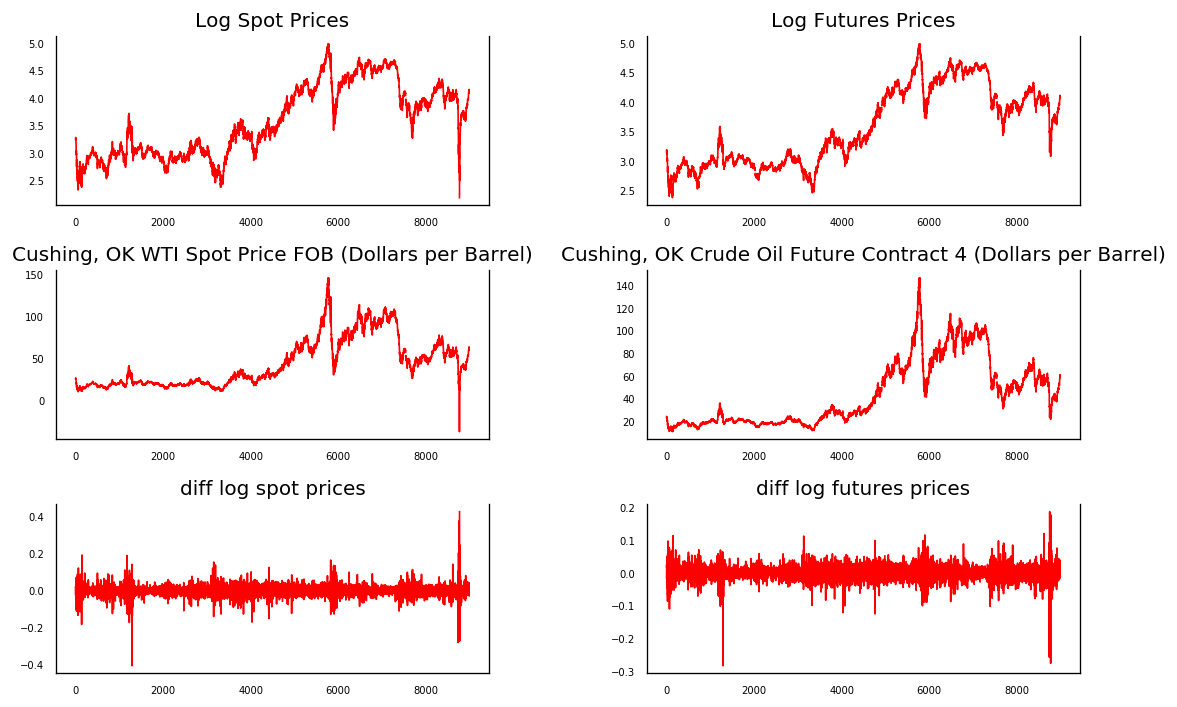

In [72]:
# Plot
merged_dataframe_clean=merged_dataframe[['Log Spot Prices','Log Futures Prices','Cushing, OK WTI Spot Price FOB (Dollars per Barrel)','Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)','diff log spot prices','diff log futures prices']]
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = merged_dataframe_clean[merged_dataframe_clean.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(merged_dataframe_clean.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [74]:
df_model =merged_dataframe_clean[['diff log spot prices','diff log futures prices']]
df_model = df_model.fillna(method = 'ffill').iloc[1:]
model = VAR(df_model)
result = model.fit(0)
result.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 06, Mar, 2021
Time:                     17:10:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.1983
Nobs:                     8995.00    HQIC:                  -16.1993
Log likelihood:           47334.2    FPE:                9.21476e-08
AIC:                     -16.1999    Det(Omega_mle):     9.21271e-08
--------------------------------------------------------------------
Results for equation diff log spot prices
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000250         0.000285            0.878           0.380

Results for equation diff log futures prices
           coefficient       std. error           t-stat            prob
-------------------------------

In [64]:
df_model.tail()

,diff log spot prices,diff log futures prices
8991,0.936093,0.806476
8992,0.438255,0.806476
8993,-1.514128,0.806476
8994,-1.514128,0.806476
8995,-1.514128,0.806476


## perform linear regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
model = LinearRegression()